# Assignment 1
Prepared by 

*G13*

*Brüß, Claas*,

*Koumene Taffo, Gildas Igor(03696160)*,

*Li, Bowen(03709969)*,

*Muralidharan, Akshaya (03693620)*,

*Nemyrovska, Maryna(03694104)*.



## Task1

Let ${C_d} = \left\{ {x \in {\mathbb{R}^p}|\parallel x{\parallel _\infty } \leqslant \frac{d}{2}} \right\}$ denote the  $p$-dimensional hypercube of edge length $d$, centered at the origin. Assuming $X$ to be uniformly distributed  in ${C_1}$, let determine $d$ in dependence of $p$ and $q \in \left[ {0,1} \right]$, such that 
 ###### $$\Pr \left( {X \in  {C_d}} \right) = q$$ 
 holds.
 ##### $\bullet $
We define the probability that $X \in {C_d} \subset {C_1}$ simply as the ratio of the volume of ${C_d}$ relative to the entire volume of ${C_1}$, hypercube of unit edge length:


 ###### $$\Pr \left( {X \in {C_d}} \right) = \frac{{Vol\left( {{C_d}} \right)}}{{Vol\left( {{C_1}} \right)}}$$

Recall that the volume of a $p$-dimensional hypercube of edge $r$ is given by ${r^p}$. This implies that,

###### $$Vol\left( {{C_d}} \right) = {d^p}\;,\;Vol\left( {{C_1}} \right) = {1^p}.$$

Hence,

###### $$\Pr \left( {X \in {C_d}} \right) = \frac{{Vol\left( {{C_d}} \right)}}{{Vol\left( {{C_1}} \right)}} = \frac{{{d^p}}}{1} = {d^p}$$


Given that  $\Pr \left( {X \in {C_d}} \right) = q$ as stated in the exercise, equating the two expressions of $\Pr \left( {X \in {C_d}} \right)$ yields:

###### $$q = {d^p} \Rightarrow d = {\left( q \right)^{\frac{1}{p}}}$$


###### $$\boxed{d = {{\left( q \right)}^{\frac{1}{p}}}}$$



##### $\bullet $
Let the components of the p-dimensional random variable ${X^p}$ be independent and
have the standard normal distribution. Knowing that $\Pr \left( {|{X^1}| \leqslant 2.576} \right) = 0.99,$ let determine for an arbitrary p, the probability $\Pr \left( {\parallel {X^p}{\parallel _\infty } > 2.576} \right)$ for any of the components of ${X^p}$ to lie outside the interval $\left[ { - 2.576,2.576} \right]$.

This probability can be expressed as:
$$\begin{gathered}
  \Pr \left( {\parallel {X^p}{\parallel _\infty } > 2.576} \right) = 1 - \Pr \left( {\parallel {X^p}{\parallel _\infty } \leqslant 2.576} \right) \hfill \\
   \;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;= 1 - \Pr {\left( {|{X^1}| \leqslant 2.576} \right)^p} \hfill \\
  \;\;\;\;\;\;\;\;\;\; = 1 - {\left( {0.99} \right)^p} \hfill \\ 
\end{gathered} $$



###### $$\boxed{\Pr \left( {\parallel {X^p}{\parallel _\infty } > 2.576} \right) = 1 - {{\left( {0.99} \right)}^p}}$$


Evaluating the probability for some values of $p.$

 $\cdot p=2$
###### $\Pr \left( {\parallel {X^2}{\parallel _\infty } > 2.576} \right) = 1 - {\left( {0.99} \right)^2} = 0.0199$


 $\cdot p=3$
###### $\Pr \left( {\parallel {X^3}{\parallel _\infty } > 2.576} \right) = 1 - {\left( {0.99} \right)^3} = 0.0297$


 $\cdot p=500$
###### $\Pr \left( {\parallel {X^{500}}{\parallel _\infty } > 2.576} \right) = 1 - {\left( {0.99} \right)^{500}} = 0.9934$

## Task 2


In [1]:
import numpy as np
from numpy import linalg as LA
import math
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
N=100 #Number of vectors


In [3]:
d=2 # the dimension of each vector

In [4]:
vectors= np.random.uniform(low=-1, high=1, size=[N,d]) # Sampling the N random vectors of dimension d.

We define two helper functions below

In [5]:
def angle(X,i,j):
     # This function compute the angle between row i and row j of a matrix X
         # Having in mind that the N vectors of dimension d form a N*d Matrix
   
 # compute norm of vector
    Xi_norm=LA.norm(X[i])
    Xj_norm=LA.norm(X[j])
       #dot product of two vectors 
    XiXj_dot=X[i].dot(X[j])  
    
    return math.acos(XiXj_dot/(Xi_norm*Xj_norm))# angle between the two vectors

In [6]:
def Average_minimum_angle(X):
     #This function Compute  the Average mininum angle
    N=X.shape[0]
    mini_angles=[]
    for i in range(N):
        mini_angle=np.inf # initialize the mini angle with infinity
        for j in range(N):
            if i!=j:
                ang=angle(X,i,j)
                if ang < mini_angle:
                    mini_angle=ang
                
        mini_angles.append(mini_angle) 
    aver_min_ang=sum(mini_angles)/N   #compute the average of the N minimum angles 
   
    return math.degrees(aver_min_ang) #return the average minimum angle in degrees.

In [7]:
Average_minimum_angle(vectors) # Average minimum angle between N=100 vectors of dimension d =2

1.788379095647181

In [8]:
#Compute the Average minimum angle for N vectors with different  dimension in range d=1....1000

N=100
d_range = np.arange(1,1002,2)
all_mini_ang=[]
for k in d_range:
    vectors= np.random.uniform(low=-1, high=1, size=[N,k])
    all_mini_ang.append(Average_minimum_angle(vectors))

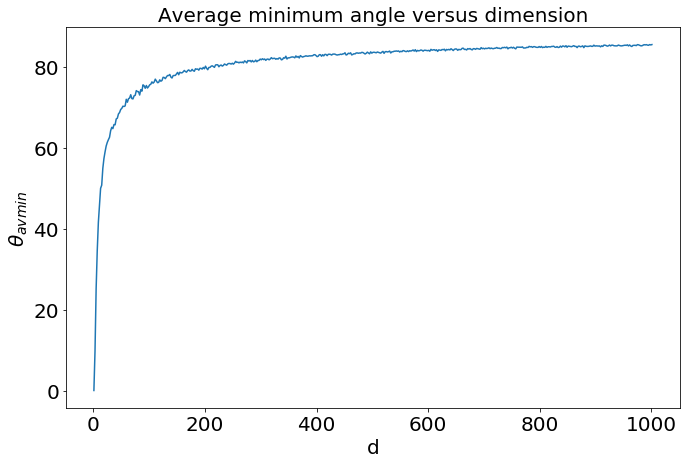

In [9]:
# plot the Average minimum angle against dimension
fig = plt.figure(figsize=(11,7))
plt.plot(d_range, all_mini_ang)
plt.title("Average minimum angle versus dimension", fontsize=20)
plt.xlabel("d", fontsize=20)
plt.ylabel("$\\theta_{avmin}$", fontsize=20)
ax = plt.gca()
ax.tick_params(labelsize=20)
plt.show()

The graph shows that the average minimum angle tends to ${90^ \circ }$ with increasing dimension. Hence  two randomly sampled vectors $x,y \in [-1, 1]^d \subset {R}^d$ will appear to be orthogonal (**perpendicular to each other**)  with high probability.


If the **sample size** of randomly generated vectors increases, then only the probablity of all of them being perpendicular to each other changes.

Thus more particular:

$$P \biggl\{\lvert \langle x_i, x_j \rangle \rvert \leq \frac{\sqrt{6 ln n }}{\sqrt{d-1}} \biggr\} \geq 1 -O\biggl(\frac{1}{n}\biggr),  \quad i \neq j, $$
$n$ is a sample size here and we have generated $x_1, ..., x_n$ from a unit ball uniformly.

Also note that the angle between two generated vectors is expressed by the scalar product of them divided by the product of their length. 
We are also using the result that
$$P \biggl \{ ||\left (x_i)\right||_2 \leq 1 - 2\frac{ln n}{d} \biggr\} = $$ 

$$=\frac{Vol(Bd(0, 1 - \frac{2 ln n}{d}))}{Vol(Bd(0, 1))} =$$  $$=(1 - \frac{2 ln n}{d})^d \cdot \frac{Vol(Bd(0, 1 ))}{Vol(Bd(0, 1))}  =$$ 

$$= (1 - \frac{2 ln n}{d})^d \overset{1-x \leq e^x}{\leq} exp[(1 -\frac{2 ln n}{d} )d] = \frac{1}{n^2}.$$

Then $P \biggl \{ \exists i ||\left (x_i)\right||_2 \leq 1 - 2\frac{ln n}{d} \biggr\} \leq n \cdot \frac{1}{n^2} = \frac{1}{n} \Rightarrow P \biggl \{ \forall i ||\left (x_i)\right||_2 \leq 1 - 2\frac{ln n}{d} \biggr\} \leq 1- \frac{1}{n}. $ Then all the uniformly samled vectors from a ball are of length 1 with hight probability.

To prove $$P \biggl\{\lvert \langle x_i, x_j \rangle \rvert \leq \frac{\sqrt{6 ln n }}{\sqrt{d-1}} \biggr\} \geq 1 -O\biggl(\frac{1}{n}\biggr),  \quad i \neq j, $$ we need a concentration inequality, that states that all the volume is concentrated near the equator, or , in other words,
$\forall c \geq 1 , d \geq 3 $
$$P\biggl\{ \lvert x_k \rvert \leq \frac{{c}}{\sqrt{d-1}}\biggr\} \geq 1 -\frac{2}{c}\biggl(\exp{\frac{-c^2}{2}}\biggr),$$
where $x_k$ is a fraction of a $d$ dimensional ball.




*Proof:*

Let us conside the projection of two fixed points:

$$ \mid Pr_x(x’) \mid=  \mid\langle x’, \frac{x}{||\left (x)\right||_2}\rangle\mid \Rightarrow \mid \langle x’, \frac{x}{||\left (x)\right||_2}\rangle\mid \cdot {||\left (x)\right||_2} = Pr_x(x’) \cdot {||\left (x)\right||_2} \leq Pr_x(x’),$$ since x is from the unit ball, hence its norm cant be more than 1. 

Applying the concentration inequality ( near the equator) we obtain:


$$P\biggl\{\mid \langle x, x’ \rangle\mid \geq \frac{\sqrt{6 ln n }}{\sqrt{d-1}}  \biggr\} \iff P\biggl \{\mid Pr_x(x’)\mid\geq \frac{\sqrt{6 ln n }}{\sqrt{d-1}} \biggr \} \leq \frac{2}{\sqrt{6 ln n }}\biggl(\exp{\frac{-(\sqrt{6 ln n })^2}{2}}\biggr) =$$
$$\exp ( -3ln n + ln2 - ln(\sqrt{6 ln ((n)}) \leq \exp(-3ln n + ln2 ) = O\biggl(\exp^{ln(\frac{1}{n^3})}\biggr) = O\biggl(\frac{1}{n^3}\biggr).$$

Since we have $\frac{n(n-1)}{2}$ pairs of vectors, we fetch

$$P\biggl\{ \exists i, j: \mid\langle x, x’ \rangle\mid \geq \frac{\sqrt{6 ln n }}{\sqrt{d-1}}\biggr \} \leq \frac{1}{n^3} \frac{n^2 -n }{2} = O\biggl(\frac{1}{n}\biggr). $$
So
$$P\biggl \{\mid \langle x_i, x_j \rangle \mid \leq \frac{\sqrt{6 ln n }}{\sqrt{d-1}} \biggr\} \geq 1 -O\biggl(\frac{1}{n}\biggr),  \quad i \neq j, $$ what we needed to prove.




## Task 3

#### *3.1* 
Yes, since all the entries in the table sum upto 1.

#### *3.2.1* 
$$ E_{Y|X=2}[Y] = (1*0.4) + (2*0.14) + (3*0.05) = 0.4 + 0.28 + 0.15 = 0.83 $$


#### *3.2.2* 
$$ P(X=1|Y=3) = \frac{P(X=1,Y=3)}{P(Y=3)} = \frac{0.13}{0.13+0.05} = 0.722 $$

#### *3.3*
The given function is not a probability density function since $$\int_0^{1} \int_0^{\frac{1}{2}} 1 dy dx = \frac{1}{2} \neq 1$$

#### *3.4*
Marginal density function for X and Y are
$$ p(x) = \int_{0}^{+\infty} 2\exp(-(x+y)) dy = 2e^{-x} \int_{0}^{+\infty}e^{-y} dy = 2e^{-x} (-e^{-y}) \rvert_{0}^{+\infty} = 2e^{-x} (\lim_{y \rightarrow +\infty}{(-e^{-y})}   + e^0) = 2e^{-x}(0+ 1) =   2e^{-x}.  $$

$$ p(y) = \int_{0}^{y}2\exp(-(x+y)) dx = 2e^{-y} \int_{0}^{y}e^{-x}dx =  2e^{-y} \cdot (-e^{-x}) \rvert_{0}^{y} = 2e^{-y} \cdot ( -e^{-y} + 1) =-2e^{-2y} + 2e^{-y}.$$

#### *3.5*
$$ p_X(X \rvert Y = y) = \frac{p_{X,Y}(X,Y)} {p_Y(Y)}.$$
The marginal probability of Y is equal to 
$$p_Y(Y) = \frac{1}{15}\int_{0}^{3} (2x + 4y)  dx = \frac{1}{15} (\frac{2x^2}{2} + 4xy) \rvert_{0}^{3} = \frac{1}{15} (9+ 12y).  $$
The joint probability is equal to 
$$ p_{X,Y}(X,Y) = \frac{1}{15} (2x+4y),$$ with constrictions on X and Y.
Then 
$$p_X(X \rvert Y = y) = \frac{p_{X,Y}(X,Y)} {p_Y(Y)} =  \frac{ \frac{1}{15} (2x+ 4y)}{\frac{1}{15} (9+12y)} = \frac{2x +4y}{9 +12y}.$$
So we obtain

$$P(X\leq 2 \lvert Y=\frac{1}{2}) = \int_{0}^{2} \frac{2x +4y}{9 +12y} dx = \int_{0}^{2} \frac{2x +2}{9 +6} dx = \frac{1}{15} (\frac{2x^2}{2} + 2x) \rvert_{0}^{2} = \frac{1}{15} \cdot (4 + 4) = \frac{8}{15}.$$

The answer is $\boxed{\frac{8}{15}}.$

## Task 4


$X$ is random variable, $ X\in\mathbb{R}^{p}$ ,   $\mu$ is the expected value of $X$ where $\mu_{i}=E[X_{i}]$

$X$ and $\mu$ can be shown in the form of vector:

$$\mathbf{X}=\begin{bmatrix}
X_{1}  \\
X_{2}  \\
\vdots \\
X_{n}
\end{bmatrix} 
\quad \quad
\mathbf{\mu}=\begin{bmatrix}
\mu_{1}  \\
\mu_{2}  \\
\vdots \\
\mu_{n}
\end{bmatrix} $$


the covariance matrix $C$ is the matrix whose $(i,j)$ entry is the covariance

$$ C_{ij}=E[(X_{i}-\mu_{i})[(X_{j}-\mu_{j})] $$


$$C=\begin{bmatrix}
E[(X_{1}-\mu_{1})(X_{1}-\mu_{1})] & E[(X_{1}-\mu_{1})(X_{2}-\mu_{2})] & \cdots &E[(X_{1}-\mu_{1})(X_{p}-\mu_{p})] \\
E[(X_{2}-\mu_{2})(X_{1}-\mu_{1})]&E[(X_{2}-\mu_{2})(X_{2}-\mu_{2})] & \cdots & E[(X_{2}-\mu_{2})(X_{p}-\mu_{p})] \\
\vdots & \vdots & \ddots & \vdots \\
E[(X_{p}-\mu_{p})(X_{1}-\mu_{1})]&E[(X_{p}-\mu_{p})(X_{2}-\mu_{2})] & \cdots & E[(X_{p}-\mu_{p})(X_{p}-\mu_{p})]
\end{bmatrix} $$

Obviously, $C$ is a symmetric matrix.

The definition above is equivalent to the matrix

$$ C=E[(\mathbf{X}-\mathbf{\mu})(\mathbf{X}-\mathbf{\mu})^{T}] $$

for any vector $y\in \mathbb{R}^{p}$, 

$$y^{T}Cy=y^{T}E[(\mathbf{X}-\mathbf{\mu})(\mathbf{X}-\mathbf{\mu})^{T}]y    \\
\quad \quad=E[y^{T}(\mathbf{X}-\mathbf{\mu})(\mathbf{X}-\mathbf{\mu})^{T}y]     \\
\quad \quad=E[((\mathbf{X}-\mathbf{\mu})^{T}y)^{T}((\mathbf{X}-\mathbf{\mu})^{T}y)]     \\
\quad \quad=E[||(\mathbf{X}-\mathbf{\mu})^{T}y||^{2}]  \\
\quad \quad \geqslant 0 \\ $$

So $C$ is also a positive semidefinite matrix.
